## 문제 상황 및 데이터 살펴보기

----
### 시나리오
A게임사는 이번에 업데이트한 게임 Version에 대해서 적용 여부를 검토 중이다. 
단순한 버그를 잡기위한 업데이트가 아닌 게임의 컨텐츠와 방식에 대한 전반적인 내용이 변경되는 
대대적인 업데이트라 반영하기 이전에 정말 효과가 있는지 검증해보고자 한다. 
따라서 몇 명의 User에 대해서 테스트해보고 효과가 있다면 Version up을 진행하고자 한다.


In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [78]:
df = pd.read_csv('/Users/hj/Documents/무제/모바일게임A/game_abtest.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


- userid : 사용자 ID
- version : 버젼
- sum_gamerounds : 총 플레이 횟수
- retention_1 : 1일 이후 재방문
- retention_7 : 7일 이후 재방문

> 문제 정의 및 기대효과

- version 업데이트 적용여부가 불분명하여, 테스트를 통해 업데이트 진행여부 결정

> 성과 측정 
-  T test 결과, 유의미성 확인(P-value)
- P-value : 0.05 미만 -> 유의미함

> 현업적용

- T test 결과에 따라 업데이트 결정

> 테스트 설계시 주의사항

- 비교하려는 두 집단에 대한 고객들을 동일한 특성을 가진 고객들을 샘플링해야함
- t-test, 카이제곱 검정을 한번만 수행하고 마는 것이 아니라, 두번 세번 해봐서 유의미한 결과가 나오는지, 경향성이 반복되는지 확인
- 첫번째 테스트 결과가 안좋다고 거기서 끝내면 안됨.
    - 왜 안좋았는지에 대한 추가 분석을 통해 개선점 도출하고, 개선한후 다시 테스트 수행해봐야 함


In [79]:
df.shape

(90189, 5)

In [80]:
df.info()
# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [81]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [82]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


- 연속형 변수는 t- test로 검정
- 범주형 변수는 카이제곱 검정으로 확인 (구성비에 대한 비교)
-- 해당 데이터셋에서 검정해야하는 컬럼이 bool 타입(범주형) 이기 때문에 카이제곱 검정으로 a/b test 진행

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/1514458296.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sum_gamerounds'])


<Axes: xlabel='sum_gamerounds', ylabel='Density'>

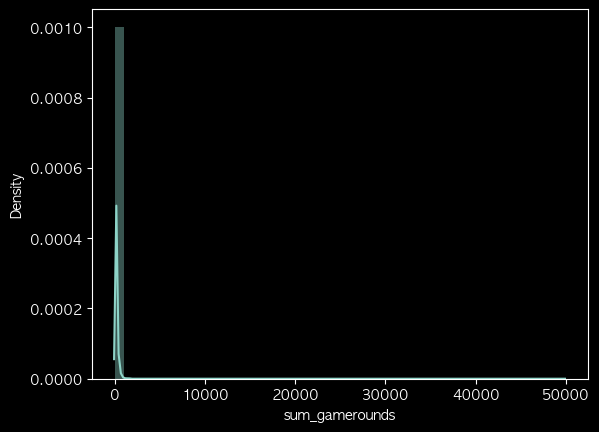

In [83]:
plt.style.use(['dark_background'])
sns.distplot(df['sum_gamerounds'])

In [84]:
# 5000회 이상인 데이터 조회 

df[df['sum_gamerounds']>3000]  # Max 값 찾음

# sum_gamerounds가 49854인 데이터를 제외하면 최댓값이 2000대 인것을 보면, outlier일 확률이 높음
# 현업의 지식에 기반하여 아웃라이어 처리를 할지말지를 정의해야 함

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [85]:
df = df[df['sum_gamerounds'] < 5000]
df.describe()

,userid,sum_gamerounds
count,9.018800e+04,90188.000000
mean,4.998397e+06,51.320253
std,2.883298e+06,102.682719
min,1.160000e+02,0.000000
25%,2.512211e+06,5.000000
50%,4.995804e+06,16.000000
75%,7.496461e+06,51.000000
max,9.999861e+06,2961.000000


/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/3393796008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sum_gamerounds'])


<Axes: xlabel='sum_gamerounds', ylabel='Density'>

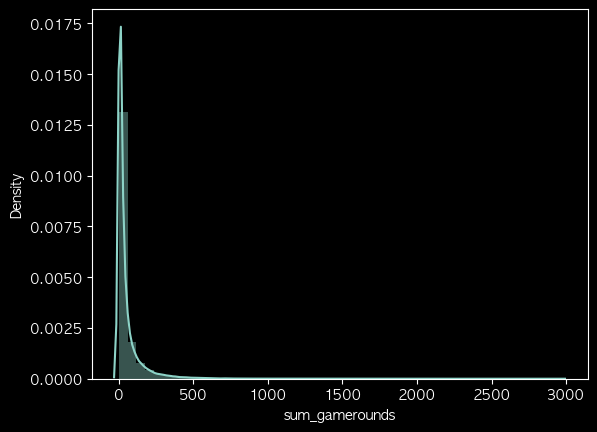

In [86]:
sns.distplot(df['sum_gamerounds'])

# A/B Test Process

### 1단계
> test 설계 : 비교하고자 하는 A/B 정의
- 게임 버전 30 vs 게임 버전 40

### 2단계
> 가설 수립 : (ex. A와 B의 반응률을 차이가 없을 것이다 / 있을 것이다)
- 보통 차이가 없을 것이다 <- 라는 식으로 가설을 세움
- P value가 0.05 미만이 나오면 가설을 기각 시키고 'A,B의 반응률은 차이가 있다' 로 결론 지음

### 3단계 
> Pilot test를 통한 데이터 수집
- 버전 30/40에 노출시킬 유저 수집, 데이터 수집, 수집 기간 정의(2주~한달)

### 4단계
> T test 및 결과 확인

### 5단계
> 현업에 적용
- 유의하다면 B를 적용 
- 유의미한 결과가 없다 ->
    - 추가 분석
    - pain point 찾기
    - pain point 개선 후 다시 A/B test 돌림

# EDA 
---

In [87]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [88]:
df['userid'].count()

90188

In [89]:
# version 별 user id 카운트

print("gate_30 :", len(df[df['version']=='gate_30']))
print("gate_40 :", len(df[df['version']=='gate_40']))

## AB test 할때 노출시킬 고객의 수를 50:50으로 노출 시켜야 함

gate_30 : 44699
gate_40 : 45489


In [90]:
# retention 값 변경 (bool -> 1/0)

df['retention_1'] = np.where(df['retention_1'] == True, 1, 0)
df['retention_7'] = np.where(df['retention_7'] == True, 1, 0)
df.head()

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/3297227481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['retention_1'] = np.where(df['retention_1'] == True, 1, 0)
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/3297227481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['retention_7'] = np.where(df['retention_7'] == True, 1, 0)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


## Sum_gamerounds 분포 비교 
---

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/3325866055.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['version']=='gate_30']['sum_gamerounds'], shade=True, label='gate_30')
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/3325866055.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['version']=='gate_40']['sum_gamerounds'], shade=True, label='gate_40')


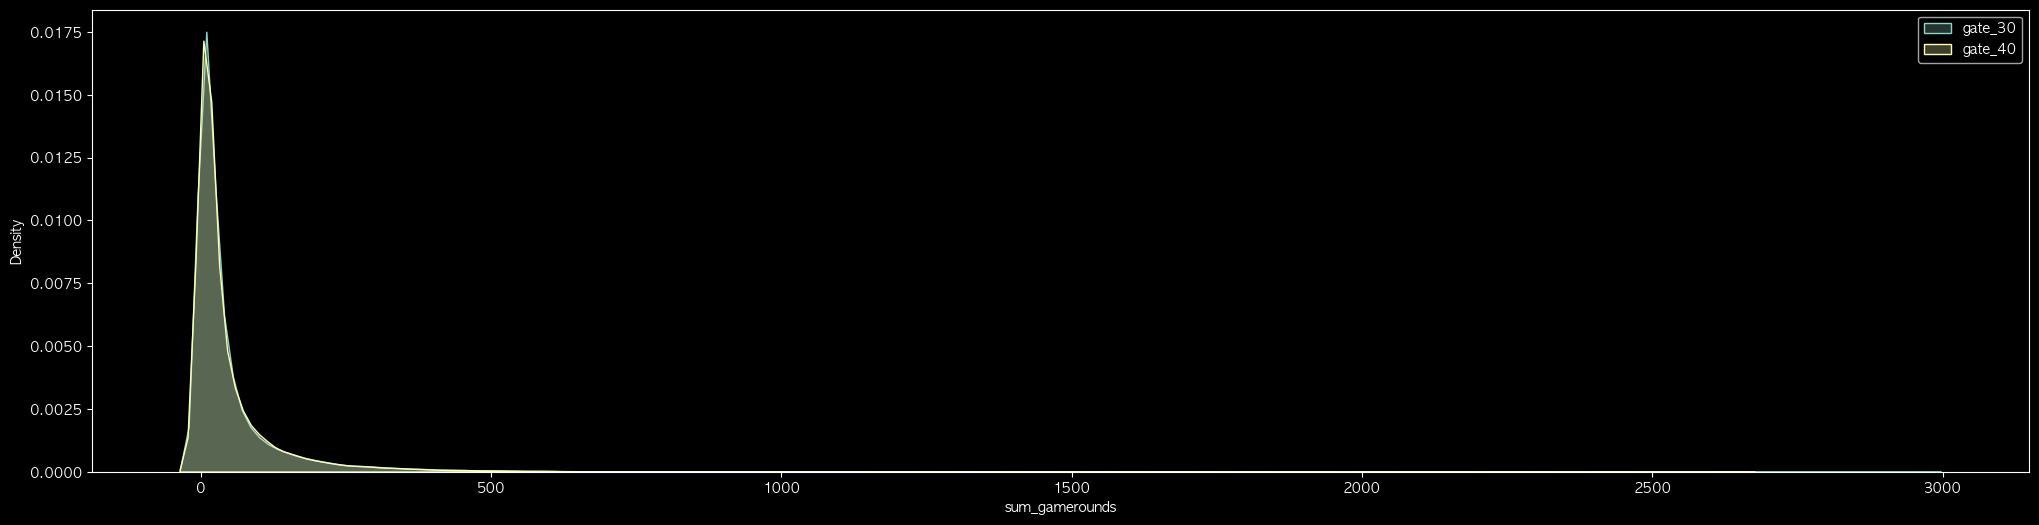

In [91]:
sns.kdeplot(df[df['version']=='gate_30']['sum_gamerounds'], shade=True, label='gate_30')
sns.kdeplot(df[df['version']=='gate_40']['sum_gamerounds'], shade=True, label='gate_40')
plt.gcf().set_size_inches(25,6)
plt.legend()
plt.show()

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/2242333491.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['version']=='gate_30']['sum_gamerounds'], shade=True, label='gate_30')
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/2242333491.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['version']=='gate_40']['sum_gamerounds'], shade=True, label='gate_40')


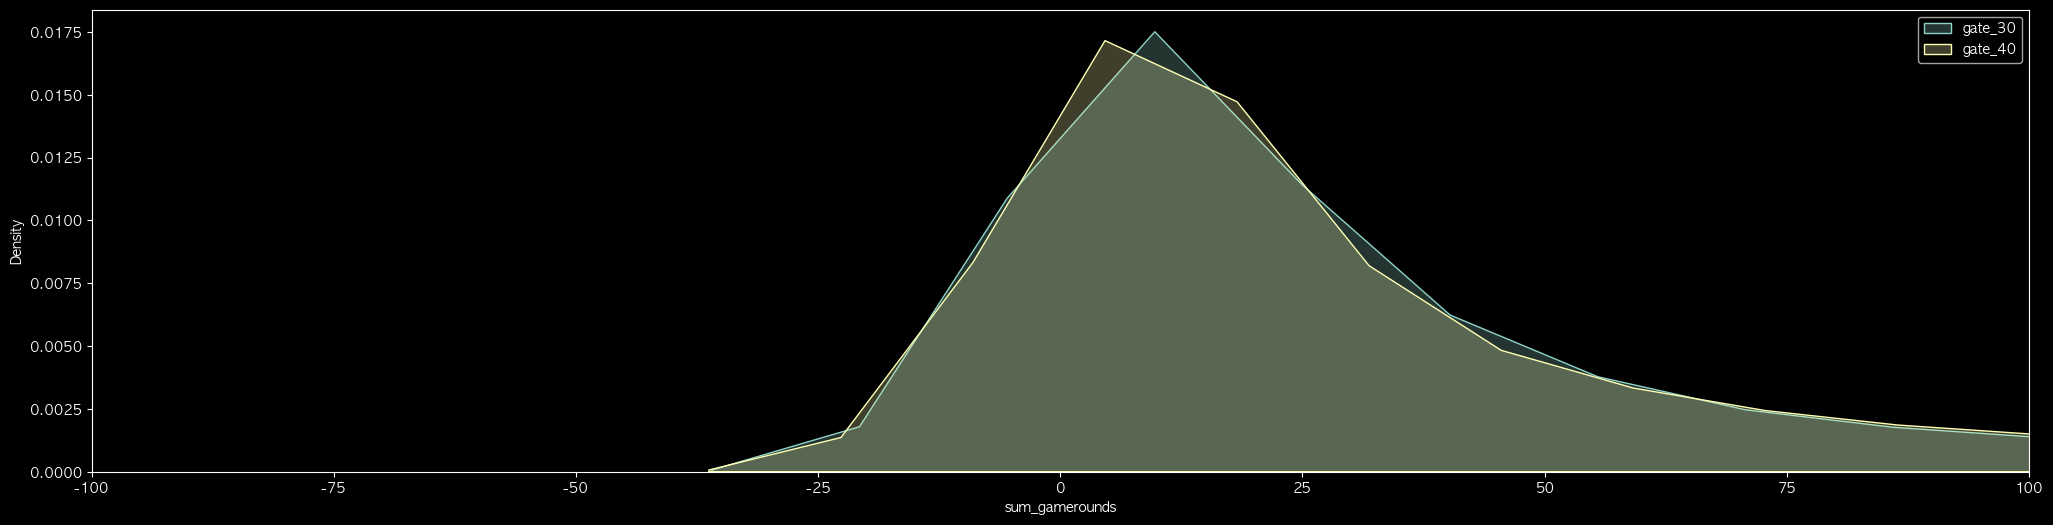

In [92]:
# ▶ sum_gamerounds, 연속형 변수의 version별 분포 비교, xlim 조절
# ▶ 그래프상으로는 크게 차이가 있는지 확인이 불가능
sns.kdeplot(df[df['version']=='gate_30']['sum_gamerounds'], shade=True, label='gate_30')
sns.kdeplot(df[df['version']=='gate_40']['sum_gamerounds'], shade=True, label='gate_40')
plt.gcf().set_size_inches(25, 6)
plt.legend()
plt.xlim(-100, 100)
plt.show()

In [93]:
df[df['version']=='gate_30']['sum_gamerounds'].mean(), df[df['version']=='gate_40']['sum_gamerounds'].mean()

## 현재까지는 유의미한 정보를 얻을 수 없음 

(51.342110561757536, 51.29877552814966)

In [94]:
## 버전별 리텐션 확인
df[df['version']=='gate_30']['retention_1'].value_counts()

retention_1
0    24665
1    20034
Name: count, dtype: int64

In [95]:
20034 / (24665 + 20034)

0.4481979462627799

In [96]:
df[df['version']=='gate_40']['retention_1'].value_counts()

retention_1
0    25370
1    20119
Name: count, dtype: int64

In [97]:
20119 / (25370 + 20119)

0.44228274967574577

In [98]:
df[df['version']=='gate_30']['retention_7'].value_counts()

retention_7
0    36198
1     8501
Name: count, dtype: int64

In [99]:
8501 / (36198 + 8501)

0.19018322557551623

In [100]:
df[df['version']=='gate_40']['retention_7'].value_counts()

retention_7
0    37210
1     8279
Name: count, dtype: int64

In [101]:
8279 / (37210 + 8279)

0.18200004396667327

#### retention_1, retention_7 모두 gate_30이 플레이횟수, 리텐션률이 더 높은 것 확인

# A/B Test를 위한 전처리 
---

In [102]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [103]:
# ▶ 연속형 변수는 평균, 범주형 변수는 반응률 (전체 데이터에서 1의 비율)

df.groupby('version')[['sum_gamerounds', 'retention_1','retention_7']].agg(['mean', 'count', 'sum'])

sum_gamerounds                 retention_1               retention_7  \
                  mean  count      sum        mean  count    sum        mean   
version                                                                        
gate_30      51.342111  44699  2294941    0.448198  44699  20034    0.190183   
gate_40      51.298776  45489  2333530    0.442283  45489  20119    0.182000   

                      
         count   sum  
version               
gate_30  44699  8501  
gate_40  45489  8279

In [104]:
# ▶ 연속형 변수는 평균, 범주형 변수는 반응률, reset_index로 multi index를 제거
df_pivot = pd.DataFrame(df.groupby('version')[['sum_gamerounds', 'retention_1', 'retention_7']].agg(['mean', 'count', 'sum']).reset_index())
df_pivot

version sum_gamerounds                 retention_1                \
                     mean  count      sum        mean  count    sum   
0  gate_30      51.342111  44699  2294941    0.448198  44699  20034   
1  gate_40      51.298776  45489  2333530    0.442283  45489  20119   

  retention_7               
         mean  count   sum  
0    0.190183  44699  8501  
1    0.182000  45489  8279

In [105]:
# ▶ Col 재정비 (1)
df_pivot.columns = ['version', 'sum_gamerounds_mean', 'sum_gamerounds_count', 'sum_gamerounds_sum',
                    'retention_1_mean', 'retention_1_count', 'retention_1_sum', 
                    'retention_7_mean', 'retention_7_count', 'retention_7_sum']
df_pivot            

,version,sum_gamerounds_mean,sum_gamerounds_count,sum_gamerounds_sum,retention_1_mean,retention_1_count,retention_1_sum,retention_7_mean,retention_7_count,retention_7_sum
0,gate_30,51.342111,44699,2294941,0.448198,44699,20034,0.190183,44699,8501
1,gate_40,51.298776,45489,2333530,0.442283,45489,20119,0.182000,45489,8279


In [106]:
# ▶ Col 재정비 (2) 원하는 컬럼만 가져옴
df_pivot = df_pivot[['version', 'sum_gamerounds_mean', 'retention_1_count', 'retention_1_sum', 'retention_7_count', 'retention_7_sum']]
df_pivot

,version,sum_gamerounds_mean,retention_1_count,retention_1_sum,retention_7_count,retention_7_sum
0,gate_30,51.342111,44699,20034,44699,8501
1,gate_40,51.298776,45489,20119,45489,8279


In [107]:
# ▶ 반응률 계산
df_pivot['retention_1_ratio'] = df_pivot['retention_1_sum'] / df_pivot['retention_1_count']
df_pivot['retention_7_ratio'] = df_pivot['retention_7_sum'] / df_pivot['retention_7_count']
df_pivot

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/938510174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot['retention_1_ratio'] = df_pivot['retention_1_sum'] / df_pivot['retention_1_count']
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/938510174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot['retention_7_ratio'] = df_pivot['retention_7_sum'] / df_pivot['retention_7_count']


,version,sum_gamerounds_mean,retention_1_count,retention_1_sum,retention_7_count,retention_7_sum,retention_1_ratio,retention_7_ratio
0,gate_30,51.342111,44699,20034,44699,8501,0.448198,0.190183
1,gate_40,51.298776,45489,20119,45489,8279,0.442283,0.182000


In [108]:
df_pivot.columns

Index(['version', 'sum_gamerounds_mean', 'retention_1_count',
       'retention_1_sum', 'retention_7_count', 'retention_7_sum',
       'retention_1_ratio', 'retention_7_ratio'],
      dtype='object')

In [109]:
df_pivot[['version','sum_gamerounds_mean', 'retention_1_ratio', 'retention_7_ratio']]

,version,sum_gamerounds_mean,retention_1_ratio,retention_7_ratio
0,gate_30,51.342111,0.448198,0.190183
1,gate_40,51.298776,0.442283,0.182000


In [110]:
# Diff 계산

print('sum_gamerounds_diff :', df_pivot['sum_gamerounds_mean'].iloc[0] - df_pivot['sum_gamerounds_mean'].iloc[1])
print('retention_1_diff :', df_pivot['retention_1_ratio'].iloc[0] - df_pivot['retention_1_ratio'].iloc[1])
print('retention_7_diff :', df_pivot['retention_7_ratio'].iloc[0] - df_pivot['retention_7_ratio'].iloc[1])

sum_gamerounds_diff : 0.04333503360787461
retention_1_diff : 0.005915196587034155
retention_7_diff : 0.00818318160884296


# T-test 활용한 A/B testing

### sum play game rounds T-test
---

In [111]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [112]:
# ▶ 등분산성 만족 X, 두 데이터에 분산이 동일하지 않다.
# ▶ [귀무가설],H0 = A, B는 분산이 동일하다. if P-value < 0.05 (기각) 
# ▶ [대립가설],H1 = A, B는 분산이 동일하지 않다. (채택)

from scipy import stats
tstat, pvalue = stats.bartlett(df[df['version'] == 'gate_30']['sum_gamerounds'], df[df['version'] == 'gate_40']['sum_gamerounds'])
print("statistic:", round(tstat,3)) # 통계량
print("P-value:", round(pvalue,3))

# P value가 0.05 미만이기 때문에 귀무가설 기각됨.
## 대립가설 채택 -> A,B 는 등분산성을 만족하지 않음 (분산이 동일하지 않음)

statistic: 6.542
P-value: 0.011


In [113]:
# ▶ P-value가 0.05이하면, 귀무가설을 기각할 수 있다.
# ▶ 귀무가설(H0) : gate30 과 gate40의 게임횟수 평균이 같다.  if P-value > 0.05 (채택) 
# ▶ 대립가설(H1) : gate30 과 gate40의 게임횟수 평균이 다르다.
tstat, pvalue = stats.ttest_ind(df[df.version == 'gate_30'].sum_gamerounds, df[df.version == 'gate_40'].sum_gamerounds, equal_var=False)  # equal_var:등분산 : 거짓임 (디폴트: True)
print("P-value:", round(pvalue,4))
#print(f"P-value: {pvalue:.4f}") 소수점 4째자리까지 표현한다.

P-value: 0.9495


> p value 가 0.05보다 크기때문에, 
gate30 <-> gate40 의 게임 횟수 평균이 같음 확인됨.
- 따라서, 버전 업을 하던 안하던, 게임 플레이에 큰 영향을 주지 않는다 (결론)

## Retention_1 카이제곱 test
---
- 범주형, 명목형 변수의 자료 분석에 사용
- 관찰 빈도와 기대빈도에 대해서 비교
- t test를 위한 고객군을 뽑을때도, 고객군들이 동일한 균질성을 가지고 뽑혔는지 확인할때도 카이제곱을 사용
    - 남여 성별 분포
    - 연령대 분포 등등

In [114]:
df_pivot

,version,sum_gamerounds_mean,retention_1_count,retention_1_sum,retention_7_count,retention_7_sum,retention_1_ratio,retention_7_ratio
0,gate_30,51.342111,44699,20034,44699,8501,0.448198,0.190183
1,gate_40,51.298776,45489,20119,45489,8279,0.442283,0.182000


In [115]:
# 필요한 Data만 추출

df_pivot_1 = df_pivot[['version', 'retention_1_count', 'retention_1_sum']]
df_pivot_1

,version,retention_1_count,retention_1_sum
0,gate_30,44699,20034
1,gate_40,45489,20119


In [116]:
# ▶ 반응한 고객과 반응하지 않은 고객에 대한 관찰 빈도가 필요함

df_pivot_1['retention_1_no'] = df_pivot_1['retention_1_count'] - df_pivot_1['retention_1_sum']
df_pivot_1 = df_pivot_1[['retention_1_sum', 'retention_1_no']]
df_pivot_1.columns = ['yes', 'no']
df_pivot_1

# sum 값은 yes 값, 
# count - sum == no 값

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/941906537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_1['retention_1_no'] = df_pivot_1['retention_1_count'] - df_pivot_1['retention_1_sum']


,yes,no
0,20034,24665
1,20119,25370


In [117]:
# ▶ H0 : A와 B의 리텐션 반응률 차이가 없다. if p-value < 0.05 미만 (x, 기각 X)
# ▶ H1 : A와 B의 리텐션 반응률 차이가 있다.
# 0.05 보다 크기때문에 귀무가설이 맞음

chi2, p_value, df, _ = stats.chi2_contingency(df_pivot_1)
print("P-value:",p_value)

P-value: 0.07500999897705693


## Retention_7 카이제곱 test
---

In [118]:
df_pivot

,version,sum_gamerounds_mean,retention_1_count,retention_1_sum,retention_7_count,retention_7_sum,retention_1_ratio,retention_7_ratio
0,gate_30,51.342111,44699,20034,44699,8501,0.448198,0.190183
1,gate_40,51.298776,45489,20119,45489,8279,0.442283,0.182000


In [119]:
# ▶ 필요한 Data만 추출
df_pivot_2 = df_pivot[['version', 'retention_7_count', 'retention_7_sum']]
df_pivot_2

,version,retention_7_count,retention_7_sum
0,gate_30,44699,8501
1,gate_40,45489,8279


In [120]:
# ▶ 반응한 고객과 반응하지 않은 고객에 대한 관찰 빈도가 필요함
df_pivot_2['retention_7_no'] = df_pivot_2['retention_7_count'] - df_pivot_2['retention_7_sum']
df_pivot_2 = df_pivot_2[['retention_7_sum', 'retention_7_no']]
df_pivot_2.columns = ['yes', 'no']
df_pivot_2

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2540/1951618006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_2['retention_7_no'] = df_pivot_2['retention_7_count'] - df_pivot_2['retention_7_sum']


,yes,no
0,8501,36198
1,8279,37210


In [121]:
# ▶ H0 : A와 B의 리텐션 반응률 차이가 없다. if p-value < 0.05 미만 (O, 기각 O)
# ▶ H1 : A와 B의 리텐션 반응률 차이가 있다.(채택)

chi2, p_value, df, _ = stats.chi2_contingency(df_pivot_2)
print("P-value:",p_value)

P-value: 0.0016391259678654423


# 결론
---

In [122]:
# ▶ diff 계산 Gate30 - Gate40
print('sum_gamerounds_diff :',df_pivot['sum_gamerounds_mean'].iloc[0] - df_pivot['sum_gamerounds_mean'].iloc[1])
print('retention_1_diff :', df_pivot['retention_1_ratio'].iloc[0] - df_pivot['retention_1_ratio'].iloc[1])
print('retention_7_diff :', df_pivot['retention_7_ratio'].iloc[0] - df_pivot['retention_7_ratio'].iloc[1])

sum_gamerounds_diff : 0.04333503360787461
retention_1_diff : 0.005915196587034155
retention_7_diff : 0.00818318160884296
